In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, './python_helper_files/')
from post_processing_multi import * # Import data post processing functions
from plotting_helper_RQC import * # Import helper functions for plotting in ipynb
warnings.filterwarnings('ignore') # supress warnings for clenliness

# Loading data
Data is provided in a folder (or series of folders) and is loaded and processed with budget assignment by the ```load_multiple_files_budget``` function. This is wrapped in the load_max_cut_data. This takes a long time due to the large number of files that needs to be processed. If data were stored differently (i.e. in a database), this would be much faster. 

In [2]:
unfiltered_rqc_data = load_rqc_data() # Full data, good for looking at relationship with shots, budget is a placeholder here.
filtered_rqc_data = filter_rqc_data(unfiltered_rqc_data) #Filtered data to which appropiate budget is assigned.

## Figures from the main text

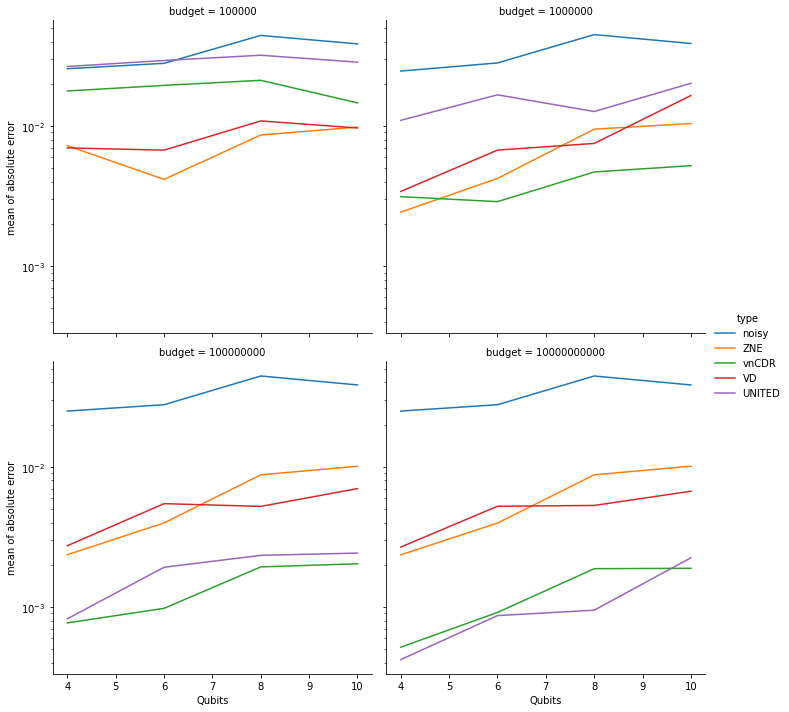

In [3]:
figure_2(filtered_rqc_data,'mean')

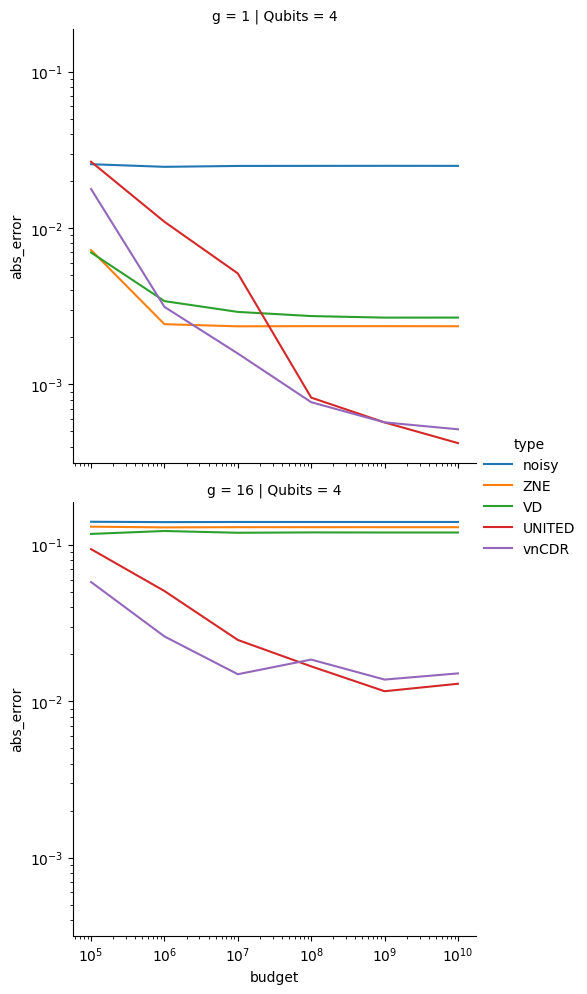

In [80]:
figure_3(filtered_rqc_data,'mean')

## Loading all the data and appendix figures

Here, you can load the training data and circuit of interest data as simple to use pandas dataframes, which could allow you to run your own error mitigation codes. The dataframe can be filtered by seed, qubit and depth (labelled by the 'file' column), and noise level (nlsp) and the column 'exact' has the exact values, which are paired with the noisy values, named 'expectation'. 

In [2]:
# Training and COI data
raw_data = load_raw_rqc_data()
train = raw_data['train']
coi = raw_data['coi']

,level_0,index,tag,nlsp,seed,qubits,expectation,exact,file,data,exact_abs


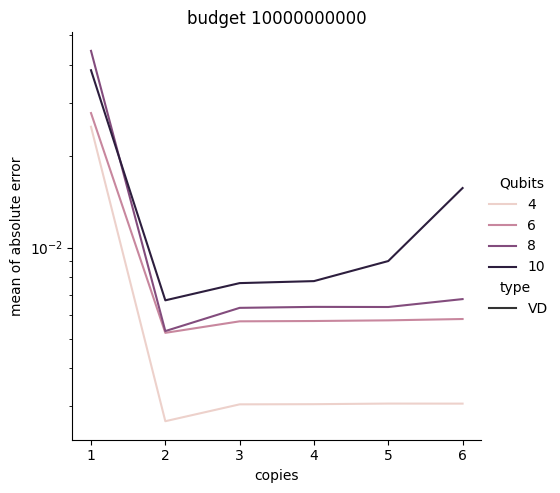

In [59]:
figure_7(filtered_rqc_data,10**10,'mean',g=1)

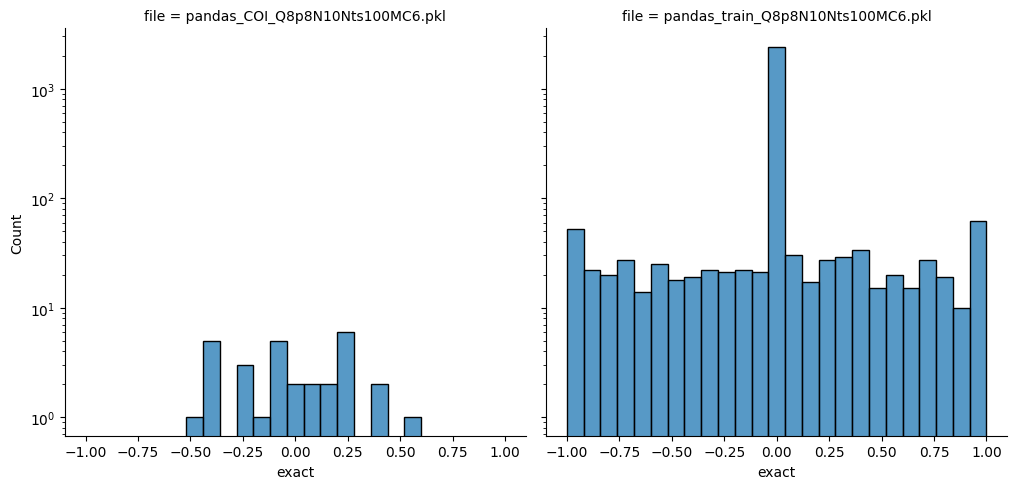

In [97]:
figure_8(coi.query('copies==1&nlsp==1'),train.query('copies==1&nlsp==1'),qubit=8,depth=8)

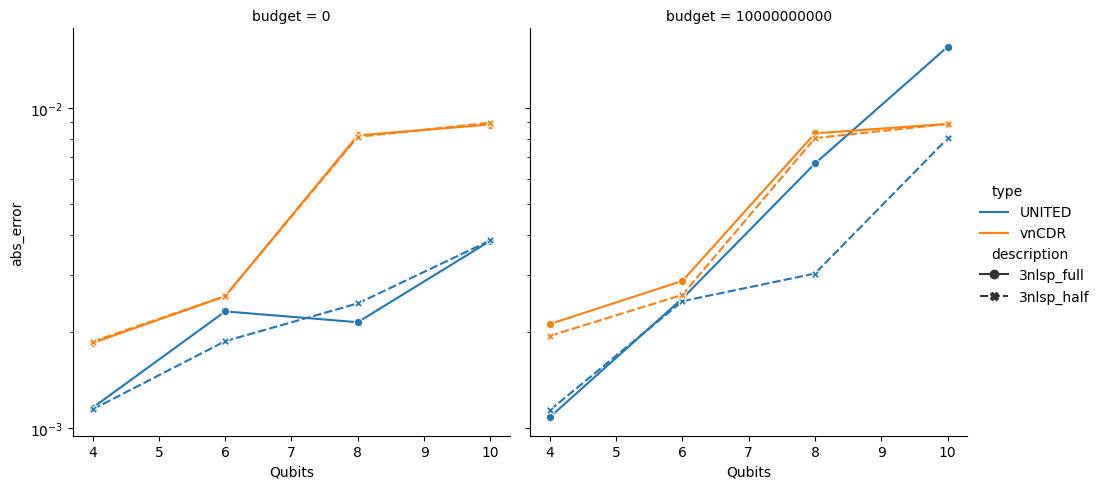

In [60]:
effect_of_training_set(filtered_rqc_data)